In [114]:
%pylab inline
import numpy as np
from numpy import genfromtxt

cmap=plt.get_cmap('jet_r')

Populating the interactive namespace from numpy and matplotlib


/home/luca/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['polyfit', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


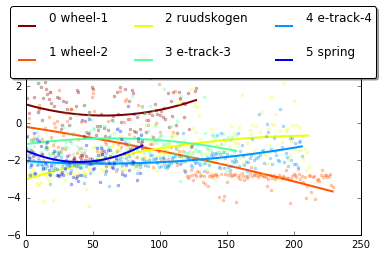

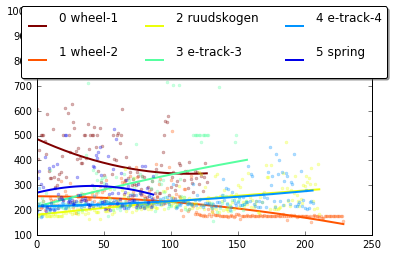

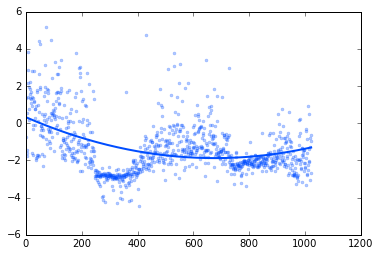

In [136]:
rewards = []
steps = []
track_names = []
i=-1
with open('../rewards.csv', 'r') as f:
    data = f.readlines()
    
for reading in data:
    try:
        rewards[i].append(float(reading.split(', ')[2].replace('\n', '')))
        steps[i].append(float(reading.split(', ')[1].replace('\n', '')))
    except:
        rewards.append([])
        steps.append([])
        track_names.append(reading)
        i+=1
        
for i in range(len(rewards)):
    r = rewards[i]
    if r:
        color = cmap(i/len(rewards))
        x = np.array(range(len(r)))
        polyfit = np.polyfit(x, r, 2)
        plt.plot(x, polyfit[0]*pow(x,2) + polyfit[1]*x + polyfit[2], label=str(int(i/2)) + ' ' + track_names[i], linewidth=2, color=color)
        plt.plot(r, '.', alpha=0.3, color=color)
        
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.show()

for i in range(len(steps)):
    s = steps[i]
    if s:
        color = cmap(i/len(steps))
        x = np.array(range(len(s)))
        polyfit = np.polyfit(x, s, 2)
        plt.plot(x, polyfit[0]*pow(x,2) + polyfit[1]*x + polyfit[2], label=str(int(i/2)) + ' ' + track_names[i], linewidth=2, color=color)
        plt.plot(s, '.', alpha=0.3, color=color)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.show()

total = []
color = cmap(0.80)
for i in range(len(rewards)):
    s = steps[i]
    if s:
        total+=rewards[i]
x = np.array(range(len(total)))
polyfit = np.polyfit(x, total, 2)
plt.plot(x, polyfit[0]*pow(x,2) + polyfit[1]*x + polyfit[2], linewidth=2, color=color)
plt.plot(total, '.', alpha=0.3, color=color)

plt.show()